In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [4]:
#I started setting the paths - Faisal 20F20646
train_dir = r'C:\Users\USER\Desktop\Spring 2024\Machine Learning intelligince\Assignment\PandaOrBear\PandasBears\Train'
test_dir = r'C:\Users\USER\Desktop\Spring 2024\Machine Learning intelligince\Assignment\PandaOrBear\PandasBears\Test'

In [5]:
#Preprocessing
# then I added Image Data Generator for loading images
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
# Then I Built a simple neural network model with dropout - 20f20646 Faisal Al Shaer
model = Sequential([
    Flatten(input_shape=(256, 256, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Training the model - 20F20646 Faisal
model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
16/16 [==============================] - 7s 429ms/step - loss: 11.8874 - accuracy: 0.5700 - val_loss: 0.3461 - val_accuracy: 0.8900
Epoch 2/10
16/16 [==============================] - 5s 303ms/step - loss: 1.6590 - accuracy: 0.7380 - val_loss: 0.2331 - val_accuracy: 0.9500
Epoch 3/10
16/16 [==============================] - 5s 304ms/step - loss: 0.5385 - accuracy: 0.7520 - val_loss: 0.2342 - val_accuracy: 0.9400
Epoch 4/10
16/16 [==============================] - 5s 313ms/step - loss: 0.5129 - accuracy: 0.7780 - val_loss: 0.3284 - val_accuracy: 0.9600
Epoch 5/10
16/16 [==============================] - 5s 316ms/step - loss: 0.5053 - accuracy: 0.7560 - val_loss: 0.3165 - val_accuracy: 0.8900
Epoch 6/10
16/16 [==============================] - 5s 320ms/step - loss: 0.4446 - accuracy: 0.8040 - val_loss: 0.2288 - val_accuracy: 0.9600
Epoch 7/10
16/16 [==============================] - 5s 326ms/step - loss: 0.4678 - accuracy: 0.7780 - val_loss: 0.1958 - val_accuracy: 0.9600
Epoch

In [8]:
# Then I started evaluating the model on test data - 20F20646 Faisal Al Shaer
test_loss, test_acc = model.evaluate(test_generator)
print(f"Neural Network - Accuracy: {test_acc}")

4/4 [==============================] - 0s 65ms/step - loss: 0.1954 - accuracy: 0.9400
Neural Network - Accuracy: 0.9399999976158142


In [9]:
# Extract features from the trained model for KNN and Decision Tree
feature_extractor = Sequential(model.layers[:-1])
train_features = feature_extractor.predict(train_generator)
test_features = feature_extractor.predict(test_generator)

4/4 [==============================] - 0s 64ms/step


In [10]:
# Get labels - 20f20646 Faisal
train_labels = train_generator.classes
test_labels = test_generator.classes


In [11]:
# Implementing Cross-Validation for Decision Tree - 20F20646 Faisal
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, train_features, train_labels, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {np.mean(dt_scores)}")

Decision Tree Cross-Validation Accuracy: 0.5


In [12]:
# Train the Decision Tree model - 20f20646 Faisal
dt_classifier.fit(train_features, train_labels)


DecisionTreeClassifier(random_state=42)

In [13]:
# Evaluate the Decision Tree model - 20f20646 Faisal
y_pred_dt = dt_classifier.predict(test_features)
accuracy_dt = accuracy_score(test_labels, y_pred_dt)
precision_dt = precision_score(test_labels, y_pred_dt)
recall_dt = recall_score(test_labels, y_pred_dt)
f1_dt = f1_score(test_labels, y_pred_dt)

In [14]:
print(f"Decision Tree - Accuracy: {accuracy_dt}")
print(f"Decision Tree - Precision: {precision_dt}")
print(f"Decision Tree - Recall: {recall_dt}")
print(f"Decision Tree - F1 Score: {f1_dt}")
print(confusion_matrix(test_labels, y_pred_dt))

Decision Tree - Accuracy: 0.54
Decision Tree - Precision: 0.5357142857142857
Decision Tree - Recall: 0.6
Decision Tree - F1 Score: 0.5660377358490566
[[24 26]
 [20 30]]


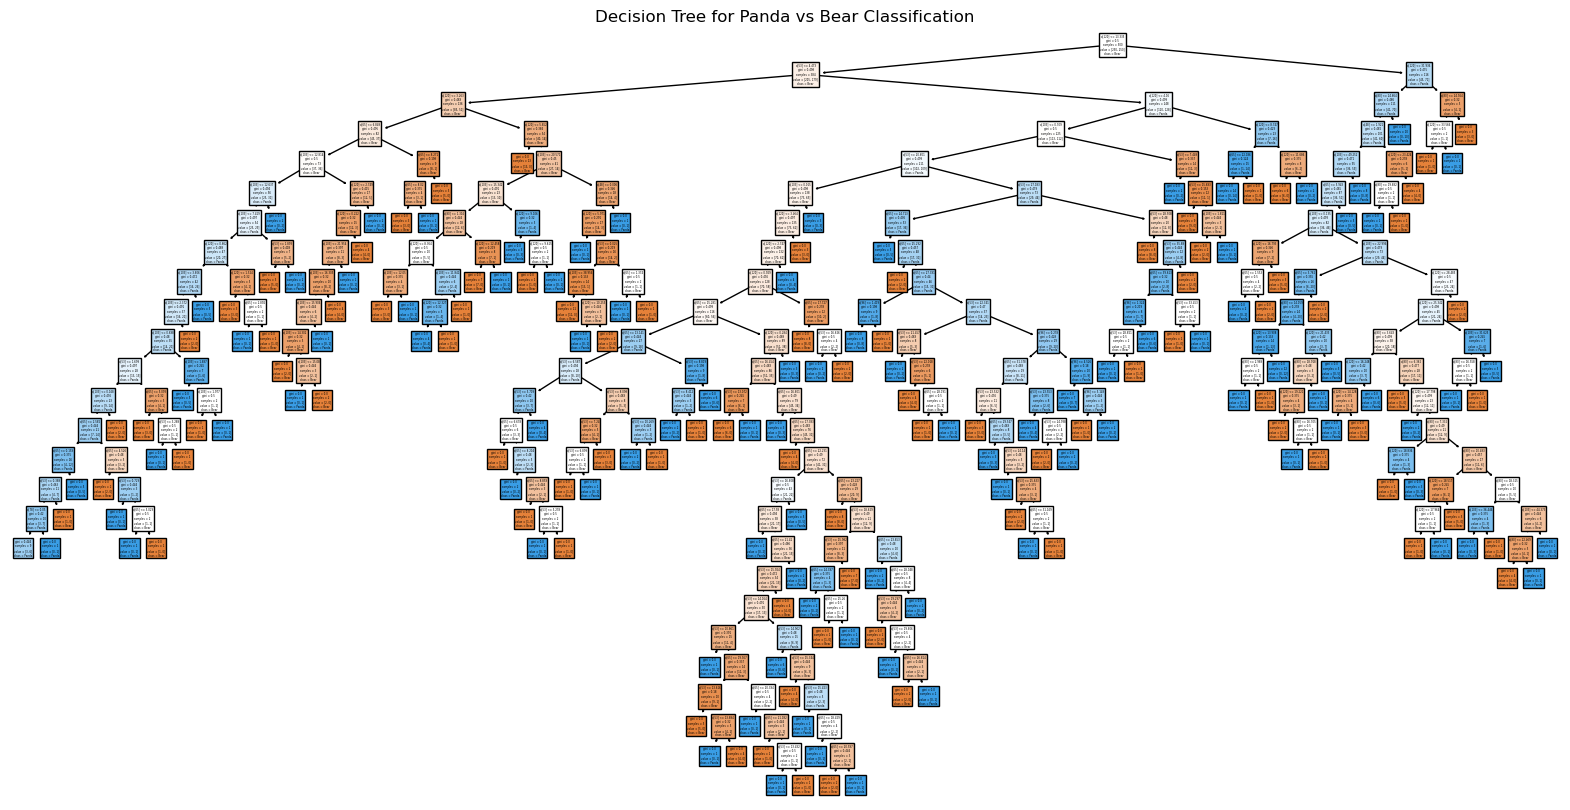

In [15]:
# Plot the decision tree - 20f20646 Faisal
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=None, class_names=['Bear', 'Panda'])
plt.title("Decision Tree for Panda vs Bear Classification")
plt.show()

In [16]:
# Grid Search for KNN - 20f20646 Faisal
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(train_features, train_labels)
print(f"Best Parameters for KNN: {grid_search.best_params_}")


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [17]:
from sklearn.model_selection import GridSearchCV  

In [18]:
# Rerun the code: Search for KNN - 20f20646 Faisal
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(train_features, train_labels)
print(f"Best Parameters for KNN: {grid_search.best_params_}")


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [19]:
# Train the KNN model with best parameters - 20f20646
knn_classifier = KNeighborsClassifier(**grid_search.best_params_)
knn_classifier.fit(train_features, train_labels)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [20]:
# Evaluate the KNN model - 20f20646 Faisal Al Shaer
y_pred_knn = knn_classifier.predict(test_features)
accuracy_knn = accuracy_score(test_labels, y_pred_knn)
precision_knn = precision_score(test_labels, y_pred_knn)
recall_knn = recall_score(test_labels, y_pred_knn)
f1_knn = f1_score(test_labels, y_pred_knn)

In [21]:
print(f"KNN - Accuracy: {accuracy_knn}")
print(f"KNN - Precision: {precision_knn}")
print(f"KNN - Recall: {recall_knn}")
print(f"KNN - F1 Score: {f1_knn}")
print(confusion_matrix(test_labels, y_pred_knn))

KNN - Accuracy: 0.57
KNN - Precision: 0.5573770491803278
KNN - Recall: 0.68
KNN - F1 Score: 0.6126126126126127
[[23 27]
 [16 34]]


In [22]:
# Compare models - 20f20646 Faisal Al Shaer
print("Neural Network vs Decision Tree vs KNN")
print(f"Neural Network - Accuracy: {test_acc}")
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}")
print(f"KNN - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1 Score: {f1_knn}")

Neural Network vs Decision Tree vs KNN
Neural Network - Accuracy: 0.9399999976158142
Decision Tree - Accuracy: 0.54, Precision: 0.5357142857142857, Recall: 0.6, F1 Score: 0.5660377358490566
KNN - Accuracy: 0.57, Precision: 0.5573770491803278, Recall: 0.68, F1 Score: 0.6126126126126127


In [23]:
#Adding ROC Curve - 20F20646
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV

In [24]:
# Binarize the labels for ROC curve plotting
y_test_binarized = label_binarize(test_labels, classes=[0, 1])

In [25]:
# Neural Network ROC Curve - 20f20646
nn_predictions = model.predict(test_generator)
fpr_nn, tpr_nn, _ = roc_curve(y_test_binarized, nn_predictions)
roc_auc_nn = auc(fpr_nn, tpr_nn)

4/4 [==============================] - 0s 58ms/step


In [26]:
# Decision Tree ROC Curve
dt_predictions = dt_classifier.predict_proba(test_features)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_binarized, dt_predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [27]:
# KNN ROC Curve
knn_predictions = knn_classifier.predict_proba(test_features)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_binarized, knn_predictions)
roc_auc_knn = auc(fpr_knn, tpr_knn)

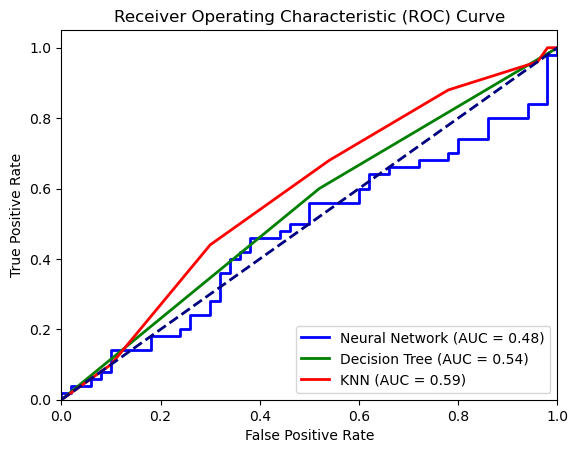

In [28]:
# Plot ROC Curves
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()